# Task 1 – Bag-of-Words (BoW)

**Sentence to Use**

In [1]:
S1 = "The queen who travelled across the vast kingdom governs wisely"

**1. Tokenize the sentence.**

In [5]:
import re

words = re.findall(r"\b\w+\b", S1.lower())
print(words)

['the', 'queen', 'who', 'travelled', 'across', 'the', 'vast', 'kingdom', 'governs', 'wisely']


**2. Build a vocabulary.**

In [7]:
vocab = {}
for token in words:
    if token not in vocab:
        vocab[token] = len(vocab)

print("Vocabulary:", vocab)


Vocabulary: {'the': 0, 'queen': 1, 'who': 2, 'travelled': 3, 'across': 4, 'vast': 5, 'kingdom': 6, 'governs': 7, 'wisely': 8}


**3. Generate a BoW vector.**

In [9]:
import numpy as np

def bow_vector(tokens, vocab):
    vec = np.zeros(len(vocab))
    for t in tokens:
        if t in vocab:
            vec[vocab[t]] += 1
    return vec

bow = bow_vector(words, vocab)
print("BoW vector:", bow)


BoW vector: [2. 1. 1. 1. 1. 1. 1. 1. 1.]


**4. Create a BoW co-occurrence matrix using an outer product.**

In [10]:
# Outer product to form a co-occurrence matrix
co_matrix = np.outer(bow, bow)

print("Co-occurrence matrix:\n", co_matrix)


Co-occurrence matrix:
 [[4. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 1. 1. 1. 1. 1. 1. 1.]]


**5. Plot the heatmap.**

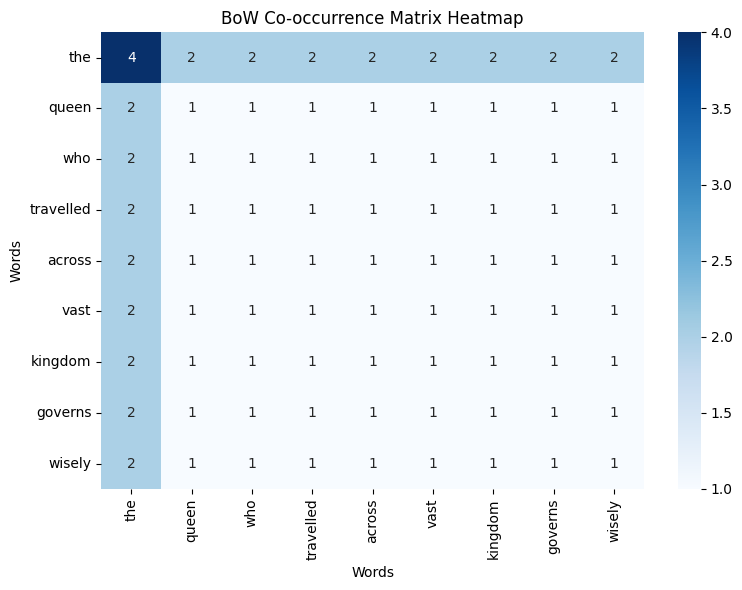

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert vocab keys to a consistent order (matching matrix indices)
words = [w for w, i in sorted(vocab.items(), key=lambda x: x[1])]

plt.figure(figsize=(8, 6))
sns.heatmap(
    co_matrix,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    xticklabels=words,
    yticklabels=words
)

plt.title("BoW Co-occurrence Matrix Heatmap")
plt.xlabel("Words")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


# Task 2 – Self-Attention

**Sentence to Use**

In [12]:
S1 = "The queen who travelled across the vast kingdom governs wisely"

**1. Assign random embeddings to each word**

In [16]:
import numpy as np

embedding_dim = 50

embeddings = {
    word: np.random.rand(embedding_dim)
    for word in vocab
}

for i in range(len(words)):
    print(f"{words[i]}: {embeddings[words[i]]}")



the: [0.12239215 0.90653981 0.24822195 0.00110651 0.22836047 0.65306937
 0.75573269 0.63102943 0.987968   0.32816314 0.28703841 0.7034083
 0.05956421 0.55972968 0.33142423 0.37431532 0.96109644 0.69779579
 0.87486354 0.22724872 0.68603478 0.07773565 0.39838752 0.78436873
 0.98773274 0.32863341 0.86291138 0.03664826 0.89768523 0.89617711
 0.86613032 0.2629405  0.74953702 0.02859622 0.41311638 0.83883761
 0.48940783 0.91476463 0.52467966 0.35235405 0.89713588 0.10595617
 0.77787193 0.60019229 0.41184702 0.02134625 0.31608686 0.84965825
 0.51368904 0.98149949]
queen: [0.81853018 0.84101699 0.88140612 0.49658943 0.92290437 0.62469145
 0.83389973 0.59061218 0.65253722 0.21324527 0.44208129 0.44979009
 0.77161544 0.02114744 0.28023294 0.11457701 0.67125096 0.68053605
 0.73106785 0.64720078 0.33272658 0.24469553 0.10049768 0.41671312
 0.70086895 0.55419303 0.76795284 0.27009676 0.1695713  0.38735134
 0.30136393 0.10970753 0.11928479 0.64677688 0.9723535  0.69166772
 0.60534841 0.08766708 0.50

**2. Compute dot-product score matrix**

In [17]:
import numpy as np

# Get words in index order (important!)
words = [w for w, i in sorted(vocab.items(), key=lambda x: x[1])]

# Initialize the score matrix
score_matrix = np.zeros((len(words), len(words)))

# Fill the matrix
for i, w1 in enumerate(words):
    for j, w2 in enumerate(words):
        score_matrix[i, j] = np.dot(embeddings[w1], embeddings[w2])

print("Dot-Product Score Matrix:\n")
print(score_matrix)


Dot-Product Score Matrix:

[[19.22349676 13.53639424 13.87304847 13.79919716 12.46039882 12.16402801
  12.94547466 14.65341794 13.31846031]
 [13.53639424 16.51100975 13.51948307 12.98012475 12.19853594 12.63734074
  11.59493986 14.12152824 14.59535181]
 [13.87304847 13.51948307 17.84009182 13.43194514 12.34390539 12.76999272
  12.56838383 14.9277378  13.72086619]
 [13.79919716 12.98012475 13.43194514 16.83739131 12.29253864 11.39130544
  10.9463029  13.91657231 13.72874479]
 [12.46039882 12.19853594 12.34390539 12.29253864 16.9325602  13.10405372
  11.16712926 14.19122166 13.22070117]
 [12.16402801 12.63734074 12.76999272 11.39130544 13.10405372 15.50785806
  11.56231735 14.25491368 12.76413813]
 [12.94547466 11.59493986 12.56838383 10.9463029  11.16712926 11.56231735
  16.47751407 13.56224281 13.41785757]
 [14.65341794 14.12152824 14.9277378  13.91657231 14.19122166 14.25491368
  13.56224281 19.50496558 16.09337523]
 [13.31846031 14.59535181 13.72086619 13.72874479 13.22070117 12.7641

**3. Apply softmax row-wise**

In [18]:
import numpy as np

def softmax_rowwise(matrix):
    # subtract max in each row for numerical stability
    row_max = np.max(matrix, axis=1, keepdims=True)
    exp_matrix = np.exp(matrix - row_max)
    softmax_matrix = exp_matrix / np.sum(exp_matrix, axis=1, keepdims=True)
    return softmax_matrix

softmax_scores = softmax_rowwise(score_matrix)

print("Row-wise Softmax Matrix:\n")
print(softmax_scores)


Row-wise Softmax Matrix:

[[9.71327964e-01 3.29221847e-03 4.60994478e-03 4.28176183e-03
  1.12250885e-03 8.34598437e-04 1.82328909e-03 1.00601829e-02
  2.64753155e-03]
 [3.61923875e-02 7.08722686e-01 3.55854782e-02 2.07506862e-02
  9.49713819e-03 1.47286608e-02 5.19343034e-03 6.49737154e-02
  1.04355817e-01]
 [1.67438652e-02 1.17572084e-02 8.84546674e-01 1.07717676e-02
  3.62875224e-03 5.55654321e-03 4.54199933e-03 4.80730276e-02
  1.43801625e-02]
 [3.93285117e-02 1.73375962e-02 2.72403062e-02 8.20688723e-01
  8.71714017e-03 3.53975679e-03 2.26835634e-03 4.42265328e-02
  3.66530768e-02]
 [9.89972764e-03 7.61899422e-03 8.81111344e-03 8.36994291e-03
  8.66678964e-01 1.88433891e-02 2.71621043e-03 5.58869049e-02
  2.11747535e-02]
 [2.16217099e-02 3.47094029e-02 3.96330202e-02 9.98391528e-03
  5.53525985e-02 6.12487144e-01 1.18459643e-02 1.74964582e-01
  3.94016629e-02]
 [2.49063034e-02 6.45326449e-03 1.70820823e-02 3.37349456e-03
  4.20710819e-03 6.24613965e-03 8.51636958e-01 4.61496362e-0

**4. Visualize the attention matrix as a heatmap**

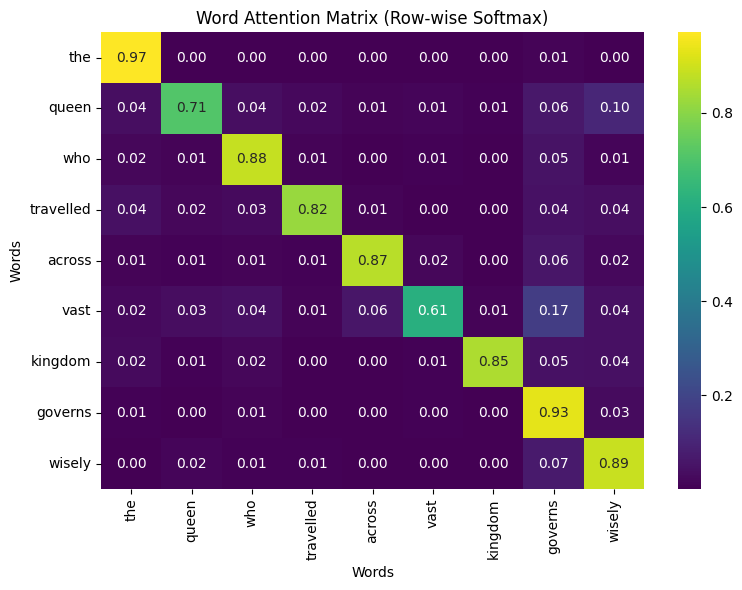

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get words in index order (matching matrix rows/columns)
words = [w for w, i in sorted(vocab.items(), key=lambda x: x[1])]

plt.figure(figsize=(8, 6))
sns.heatmap(
    softmax_scores,
    xticklabels=words,
    yticklabels=words,
    cmap="viridis",
    annot=True,       # show numbers inside cells
    fmt=".2f"         # two decimal places
)
plt.title("Word Attention Matrix (Row-wise Softmax)")
plt.xlabel("Words")
plt.ylabel("Words")
plt.tight_layout()
plt.show()
